# Analysis of AdventureWorks 2022 Sample Databases by SQLAlChemy Python SQL toolkit 

# Installing SQLAlChemy

In [1]:
!pip install sqlalchemy
!pip install pyodbc

# Importing necessary libraries and creating engine

In [1]:
from sqlalchemy import create_engine, Table, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc
import scipy.stats as stats
from scipy.stats import t
from tabulate import tabulate


# Windows authentication
Server = 'RUMON_LENOVO'
Database = 'AdventureWorks2022'
Driver = 'ODBC Driver 17 for SQL Server'
Database_Connection = f'mssql://@{Server}/{Database}?driver={Driver}'
Trusted_Connection = 'yes'

engine = create_engine(Database_Connection)
connection = engine.connect()

In [3]:
# Printing engine
print(engine)

Engine(mssql://@RUMON_LENOVO/AdventureWorks2022?driver=ODBC+Driver+17+for+SQL+Server)


In [4]:
# Checking the type of engine
print(type(engine))

<class 'sqlalchemy.engine.base.Engine'>


In [5]:
# Checking the drivers that I have access to
for driver in pyodbc.drivers():
    print(driver)

SQL Server
SQL Server Native Client RDA 11.0
ODBC Driver 17 for SQL Server
Microsoft Access Driver (*.mdb, *.accdb)
Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)
Microsoft Access Text Driver (*.txt, *.csv)


# Inspecting the database

In [6]:
# To see the schemas
inspector = inspect(engine)
schemas = inspector.get_schema_names()
print(schemas)

['db_accessadmin', 'db_backupoperator', 'db_datareader', 'db_datawriter', 'db_ddladmin', 'db_denydatareader', 'db_denydatawriter', 'db_owner', 'db_securityadmin', 'dbo', 'guest', 'HumanResources', 'INFORMATION_SCHEMA', 'Person', 'Production', 'Purchasing', 'Sales', 'sys']


In [7]:
# Schemas in a column
for schema in schemas:
    print(schema)

db_accessadmin
db_backupoperator
db_datareader
db_datawriter
db_ddladmin
db_denydatareader
db_denydatawriter
db_owner
db_securityadmin
dbo
guest
HumanResources
INFORMATION_SCHEMA
Person
Production
Purchasing
Sales
sys


In [8]:
# Calling all the table names under a specific schema:
print(inspector.get_table_names(schema='Sales'))

['August_Goal_Table', 'CountryRegionCurrency', 'CreditCard', 'Currency', 'CurrencyRate', 'Customer', 'PersonCreditCard', 'SalesOrderDetail', 'SalesOrderHeader', 'SalesOrderHeaderSalesReason', 'SalesPerson', 'SalesPersonQuotaHistory', 'SalesReason', 'SalesTaxRate', 'SalesTerritory', 'SalesTerritoryHistory', 'ShoppingCartItem', 'SpecialOffer', 'SpecialOfferProduct', 'Store']


In [9]:
# Printing all the column names of a table, here it is SalesOrderDetail table
for col in inspector.get_columns(table_name='SalesOrderDetail', schema='Sales'):
    print(col['name'])

SalesOrderID
SalesOrderDetailID
CarrierTrackingNumber
OrderQty
ProductID
SpecialOfferID
UnitPrice
UnitPriceDiscount
LineTotal
rowguid
ModifiedDate


# Querying the database 

In [10]:
# Read sql in pandas
pd.read_sql

<function pandas.io.sql.read_sql(sql, con, index_col: 'str | list[str] | None' = None, coerce_float: 'bool' = True, params=None, parse_dates=None, columns: 'list[str] | None' = None, chunksize: 'int | None' = None, dtype_backend: 'DtypeBackend | lib.NoDefault' = <no_default>, dtype: 'DtypeArg | None' = None) -> 'DataFrame | Iterator[DataFrame]'>

In [11]:
# Printing sql
print(pd.read_sql)

<function read_sql at 0x0000022D4720C720>


In [12]:
# Printing type sql:
print(type(pd.read_sql))

<class 'function'>


# Sales Schema

## Sales.SalesOrderDetail Table

In [13]:
# To see the concise summary of the table SalesOrderDetail
df1 = pd.read_sql(sql="SELECT * from Sales.SalesOrderDetail", con=connection)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   SalesOrderID           121317 non-null  int64         
 1   SalesOrderDetailID     121317 non-null  int64         
 2   CarrierTrackingNumber  60919 non-null   object        
 3   OrderQty               121317 non-null  int64         
 4   ProductID              121317 non-null  int64         
 5   SpecialOfferID         121317 non-null  int64         
 6   UnitPrice              121317 non-null  float64       
 7   UnitPriceDiscount      121317 non-null  float64       
 8   LineTotal              121317 non-null  float64       
 9   rowguid                121317 non-null  object        
 10  ModifiedDate           121317 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 10.2+ MB


In [14]:
# checking missing values in the table SalesOrderDetail
df1.isnull().sum()

SalesOrderID                 0
SalesOrderDetailID           0
CarrierTrackingNumber    60398
OrderQty                     0
ProductID                    0
SpecialOfferID               0
UnitPrice                    0
UnitPriceDiscount            0
LineTotal                    0
rowguid                      0
ModifiedDate                 0
dtype: int64

In [15]:
# Getting descriptive statistics of all column of the table SalesOrderDetail
df1.describe()

,SalesOrderID,SalesOrderDetailID,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,ModifiedDate
count,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000,121317.000000,121317
mean,57827.363782,60659.000000,2.266080,841.680836,1.162541,465.093496,0.002826,905.449207,2013-07-15 19:44:52.321768704
min,43659.000000,1.000000,1.000000,707.000000,1.000000,1.328200,0.000000,1.374000,2011-05-31 00:00:00
25%,49884.000000,30330.000000,1.000000,768.000000,1.000000,21.490000,0.000000,24.990000,2013-02-28 00:00:00
50%,57029.000000,60659.000000,1.000000,863.000000,1.000000,49.990000,0.000000,134.982000,2013-09-30 00:00:00
75%,65490.000000,90988.000000,3.000000,921.000000,1.000000,602.346000,0.000000,1120.490000,2014-01-31 00:00:00
max,75123.000000,121317.000000,44.000000,999.000000,16.000000,3578.270000,0.400000,27893.619000,2014-06-30 00:00:00
std,9009.147902,35021.345641,2.491323,86.452124,1.218604,751.885081,0.024811,1693.417389,NaN


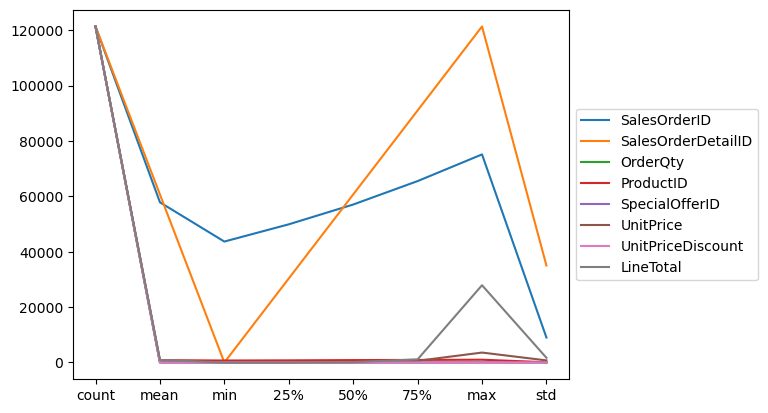

In [16]:
# Executing matplotlib inline so that we can see the plot of the describe function
df1.describe().plot().legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [17]:
# Getting summary statistics of OrderQty column
df1.OrderQty.describe()

count    121317.000000
mean          2.266080
std           2.491323
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          44.000000
Name: OrderQty, dtype: float64

In [18]:
# Summation of order quantity
total_order_quantity= df1['OrderQty'].sum()
print(total_order_quantity)

274914


In [23]:
# Average order quantity
df1["OrderQty"].mean()

2.2660797744751355

In [24]:
# Summation of unit price in the table SalesOrderDetail
df1['UnitPrice'].sum()

56423747.6147

In [25]:
# Average unit price
df1["UnitPrice"].mean()

465.0934956741429

In [20]:
# Top 10 products sold having product ID
df1.value_counts('ProductID').head(10)

ProductID
870    4688
712    3382
873    3354
921    3095
711    3090
707    3083
708    3007
922    2376
878    2121
871    2025
Name: count, dtype: int64

## Sales.Salesorderheader Table

In [25]:
# Calculate the percentage of tax on the subtotal
tax_query = """
SELECT salesorderid,customerid,orderdate,subtotal,
(taxamt*100)/subtotal AS Tax_percent
FROM sales.salesorderheader
ORDER BY subtotal desc;"""
tax_data = pd.read_sql(tax_query, con=connection)
print(tax_data)

       salesorderid  customerid  orderdate     subtotal  Tax_percent
0             51131       29641 2013-05-30  163930.3943      10.9488
1             55282       29641 2013-08-30  160378.3913      10.2805
2             46616       29614 2012-05-30  150837.4387       9.9382
3             46981       30103 2012-06-30  147390.9328       9.8971
4             47395       29701 2012-07-31  146154.5653       9.8391
...             ...         ...        ...          ...          ...
31460         52682       11142 2013-07-16       2.2900       8.0000
31461         52031       19088 2013-07-03       2.2900       8.0000
31462         51885       15640 2013-06-30       2.2900       8.0000
31463         51886       18293 2013-06-30       2.2900       8.0000
31464         51782       30078 2013-06-30       1.3740       7.9985

[31465 rows x 5 columns]


In [26]:
# Total subtotal and tax percentage
tax_data[["subtotal","Tax_percent"]].sum()

subtotal       1.098464e+08
Tax_percent    2.582642e+05
dtype: float64

In [38]:
# Average number of sales orders for all the years of the sales representatives
average_sale_query = """
WITH Sales_CTE (SalesPersonID, NumberOfOrders)
AS
(
    SELECT SalesPersonID, COUNT(*)
    FROM Sales.SalesOrderHeader
    WHERE SalesPersonID IS NOT NULL
    GROUP BY SalesPersonID
)
SELECT AVG(NumberOfOrders) AS "Average Sales Per Person"
FROM Sales_CTE;"""
average_sale_data = pd.read_sql(average_sale_query, con=connection)
print(average_sale_data)

   Average Sales Per Person
0                       223


In [27]:
# Calculate the total freight paid by each customer
total_freight_query = """
SELECT customerid,sum(freight) as total_freight 
FROM sales.salesorderheader
group by customerid
ORDER BY customerid ASC;"""
freight_data = pd.read_sql(total_freight_query, con=connection)
print(freight_data)

       customerid  total_freight
0           11000       206.2249
1           11001       159.5971
2           11002       202.8511
3           11003       203.4823
4           11004       204.9003
...           ...            ...
19114       30114       352.8671
19115       30115       265.7756
19116       30116      5846.9206
19117       30117     24534.8197
19118       30118      8357.8488

[19119 rows x 2 columns]


In [28]:
# Total freight paid
freight_data['total_freight'].sum()

3183430.2518

## Sales.SalesPerson Table

In [44]:
# Compare year-to-date sales between employees
sales_compare_query = """
SELECT TerritoryName, BusinessEntityID, SalesYTD,   
       LAG (SalesYTD, 1, 0) OVER (PARTITION BY TerritoryName ORDER BY SalesYTD DESC) AS PrevRepSales  
FROM Sales.vSalesPerson  
WHERE TerritoryName IS NOT NULL
ORDER BY TerritoryName;"""
sales_compare_data = pd.read_sql(sales_compare_query, con=connection)
print(sales_compare_data)

     TerritoryName  BusinessEntityID      SalesYTD  PrevRepSales
0        Australia               286  1.421811e+06  0.000000e+00
1           Canada               282  2.604541e+06  0.000000e+00
2           Canada               278  1.453719e+06  2.604541e+06
3          Central               277  3.189418e+06  0.000000e+00
4           France               290  3.121616e+06  0.000000e+00
5          Germany               288  1.827067e+06  0.000000e+00
6        Northeast               275  3.763178e+06  0.000000e+00
7        Northwest               284  1.576562e+06  0.000000e+00
8        Northwest               283  1.573013e+06  1.576562e+06
9        Northwest               280  1.352577e+06  1.573013e+06
10       Southeast               279  2.315186e+06  0.000000e+00
11       Southwest               276  4.251369e+06  0.000000e+00
12       Southwest               281  2.458536e+06  4.251369e+06
13  United Kingdom               289  4.116871e+06  0.000000e+00


## Sales.SalesTerritory Table

In [3]:
# Calling a table using data frame df2
df2 = pd.read_sql(sql="SELECT * from Sales.SalesTerritory", con=connection)

In [29]:
# SalesYTD by region
region_sales = pd.DataFrame(df2.groupby(by=['Group'])['SalesYTD'].sum())
region_sales.sort_values(ascending=False, by='SalesYTD')

,SalesYTD
Group,
North America,3.318289e+07
Europe,1.359051e+07
Pacific,5.977815e+06


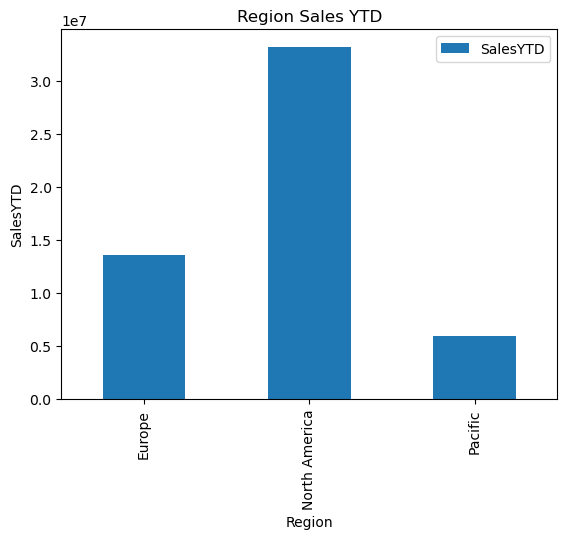

In [30]:
# Bar graph for Region Sales
region_sales.plot(kind='bar', xlabel= 'Region', ylabel='SalesYTD', title='Region Sales YTD');

In [31]:
# Sales last year by region
region_revenue = pd.DataFrame(df2.groupby(by=['Group'])['SalesLastYear'].sum())
region_revenue.sort_values(ascending=False, by='SalesLastYear')

,SalesLastYear
Group,
North America,2.509649e+07
Europe,5.340313e+06
Pacific,2.278549e+06


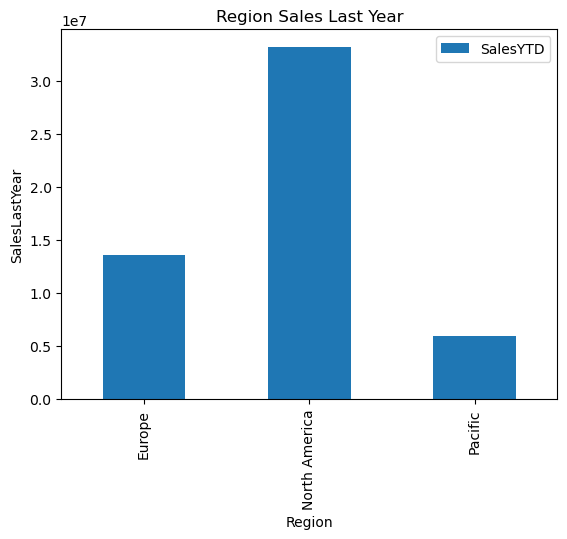

In [32]:
# Bar graph for Region LastYearSale
region_sales.plot(kind='bar', xlabel= 'Region', ylabel='SalesLastYear', title='Region Sales Last Year');

In [33]:
# SalesYTD by country
country_sales = pd.DataFrame(df2.groupby(by=['Name'])['SalesYTD'].sum())
country_sales.sort_values(ascending=False, by='SalesYTD')

,SalesYTD
Name,
Southwest,1.051085e+07
Northwest,7.887187e+06
Canada,6.771829e+06
Australia,5.977815e+06
United Kingdom,5.012905e+06
France,4.772398e+06
Germany,3.805202e+06
Central,3.072175e+06
Southeast,2.538667e+06


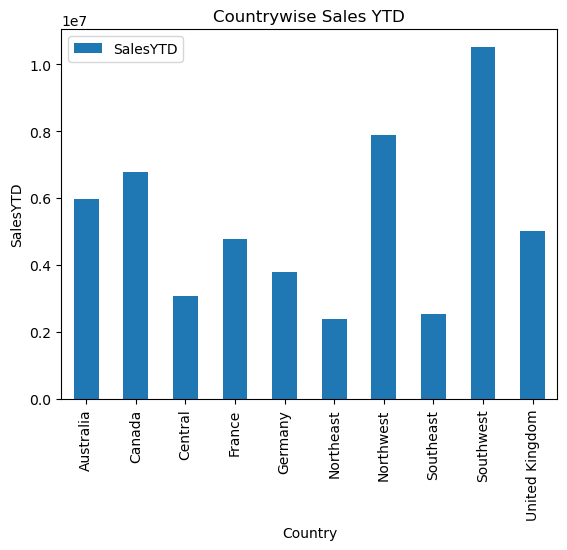

In [34]:
# Bar graph for countrywise sale YTD
country_sales.plot(kind='bar', xlabel= 'Country', ylabel='SalesYTD', title='Countrywise Sales YTD');

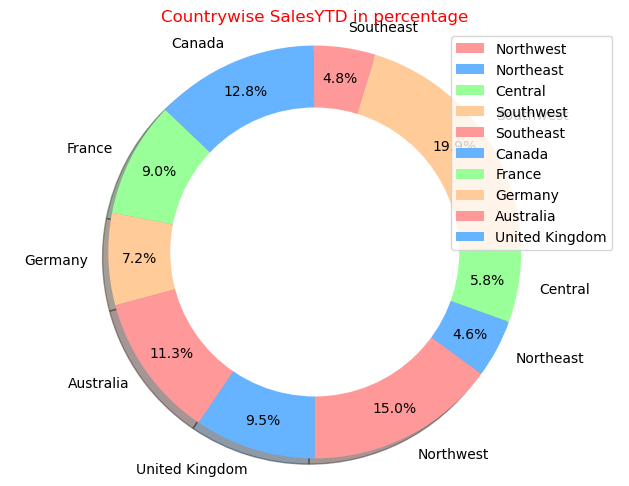

In [35]:
# Circle chart for countrywise sale YTD in percentage
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = None
 
plt.pie(df2['SalesYTD'], colors = colors,shadow='True', labels=df2['Name'], autopct='%1.1f%%', startangle=270, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title('Countrywise SalesYTD in percentage',color='red')
plt.legend()
plt.show()

In [36]:
# Last year sale by country
country_sales_lastyear = pd.DataFrame(df2.groupby(by=['Name'])['SalesLastYear'].sum())
country_sales_lastyear.sort_values(ascending=False, by='SalesLastYear')

,SalesLastYear
Name,
Canada,5.693989e+06
Southwest,5.366576e+06
Southeast,3.925071e+06
Northeast,3.607149e+06
Northwest,3.298694e+06
Central,3.205014e+06
France,2.396540e+06
Australia,2.278549e+06
United Kingdom,1.635823e+06


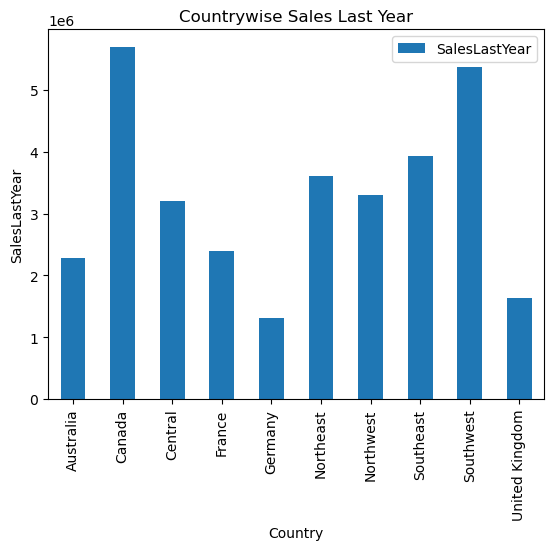

In [37]:
# Bar chart for countrywise sale for last year
country_sales_lastyear.plot(kind='bar', xlabel= 'Country', ylabel='SalesLastYear', title='Countrywise Sales Last Year');

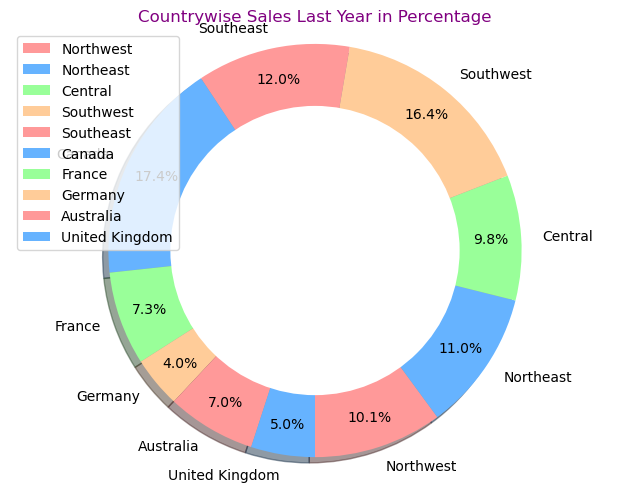

In [5]:
# Circle chart for countrywise sale for last year in percentage
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = None
 
plt.pie(df2['SalesLastYear'], colors = colors,shadow='True', labels=df2['Name'], autopct='%1.1f%%', startangle=270, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.title('Countrywise Sales Last Year in Percentage',color='purple')
plt.legend()
plt.show()

## Sales.Customer Table

In [14]:
df12=pd.read_sql('SELECT * FROM Sales.Customer', con=connection)
df12.head(10)

,CustomerID,PersonID,StoreID,TerritoryID,AccountNumber,rowguid,ModifiedDate
0,1,NaN,934.0,1,AW00000001,3F5AE95E-B87D-4AED-95B4-C3797AFCB74F,2014-09-12 11:15:07.263
1,2,NaN,1028.0,1,AW00000002,E552F657-A9AF-4A7D-A645-C429D6E02491,2014-09-12 11:15:07.263
2,3,NaN,642.0,4,AW00000003,130774B1-DB21-4EF3-98C8-C104BCD6ED6D,2014-09-12 11:15:07.263
3,4,NaN,932.0,4,AW00000004,FF862851-1DAA-4044-BE7C-3E85583C054D,2014-09-12 11:15:07.263
4,5,NaN,1026.0,4,AW00000005,83905BDC-6F5E-4F71-B162-C98DA069F38A,2014-09-12 11:15:07.263
5,6,NaN,644.0,4,AW00000006,1A92DF88-BFA2-467D-BD54-FCB9E647FDD7,2014-09-12 11:15:07.263
6,7,NaN,930.0,1,AW00000007,03E9273E-B193-448E-9823-FE0C44AEED78,2014-09-12 11:15:07.263
7,8,NaN,1024.0,5,AW00000008,801368B1-4323-4BFA-8BEA-5B5B1E4BD4A0,2014-09-12 11:15:07.263
8,9,NaN,620.0,5,AW00000009,B900BB7F-23C3-481D-80DA-C49A5BD6F772,2014-09-12 11:15:07.263
9,10,NaN,928.0,6,AW00000010,CDB6698D-2FF1-4FBA-8F22-60AD1D11DABD,2014-09-12 11:15:07.263


In [15]:
# Counting number of customers
df12['CustomerID'].count()

19820

## Sales.SpecialOffer Table

In [16]:
df14=pd.read_sql('SELECT * FROM Sales.SpecialOffer', con=connection)

In [17]:
# Number of discount given
df14['DiscountPct'].count()

16

In [18]:
# Summation of discount given in percentage
df14['DiscountPct'].sum()

3.5199999999999996

## Sales.Store Table

In [19]:
df15=pd.read_sql('SELECT * FROM Sales.Store', con=connection)

In [20]:
# Number of stores having same name
df15.value_counts('Name')

Name
Sports Products Store             2
Friendly Bike Shop                2
Rapid Bikes                       1
Racing Supply Distributors        1
Racing Tours                      1
                                 ..
Games and Sport Supply Company    1
Gasless Cycle Shop                1
Gear-Shift Bikes Limited          1
Gears and Parts Company           1
eCommerce Bikes                   1
Name: count, Length: 699, dtype: int64

In [21]:
# Number of sales store
df15['Name'].count()

701

# Production Schema

## Production.Product Table

In [39]:
# Average list price of products
average_list_price_query = """
SELECT AVG(DISTINCT ListPrice)  AS AverageListPrice
FROM Production.Product;"""
average_list_price_data = pd.read_sql(average_list_price_query, con=connection)
print(average_list_price_data)

   AverageListPrice
0          437.4042


In [6]:
df8=pd.read_sql('SELECT * from Production.Product', con=connection)

In [44]:
# Finding the total number of product
total_product= df8['Name'].count()
print(total_product)

504


In [45]:
# Name of the products
df8['Name']

0            Adjustable Race
1               Bearing Ball
2            BB Ball Bearing
3      Headset Ball Bearings
4                      Blade
               ...          
499        ML Bottom Bracket
500        HL Bottom Bracket
501       Road-750 Black, 44
502       Road-750 Black, 48
503       Road-750 Black, 52
Name: Name, Length: 504, dtype: object

In [41]:
# Calculate the sum of the ListPrice and TotalCost for each color
color_query = """
SELECT Color, SUM(ListPrice)AS ListPrice,   
       SUM(StandardCost) AS TotalCost  
FROM production.product  
GROUP BY Color  
ORDER BY Color;"""
color_data = pd.read_sql(color_query, con=connection)
print(color_data)

          Color  ListPrice   TotalCost
0          None    4182.32   2238.4755
1         Black   67436.26  38636.5002
2          Blue   24015.66  14746.1464
3          Grey     125.00     51.5625
4         Multi     478.92    272.2542
5           Red   53274.10  32610.7661
6        Silver   36563.13  20060.0483
7  Silver/Black     448.13    198.9700
8         White      36.98     13.5172
9        Yellow   34527.29  21507.6521


In [42]:
# Total ListPrice and TotalCost
color_data[["ListPrice","TotalCost"]].sum()

ListPrice    221087.7900
TotalCost    130335.8925
dtype: float64

In [43]:
# Total number of color
color_data['Color'].count()

9

## Production.ProductCategory Table

In [7]:
# To see what sorts of products the company is making
df9=pd.read_sql('SELECT * from Production.ProductCategory', con=connection)
df9['Name']

0          Bikes
1     Components
2       Clothing
3    Accessories
Name: Name, dtype: object

## Production.ProductCostHistory Table

In [47]:
# To see the production cost
df10=pd.read_sql('SELECT * from Production.ProductCostHistory', con=connection)
df10

,ProductID,StartDate,EndDate,StandardCost,ModifiedDate
0,707,2011-05-31,2012-05-29,12.0278,2012-05-29
1,707,2012-05-30,2013-05-29,13.8782,2013-05-29
2,707,2013-05-30,NaT,13.0863,2013-05-16
3,708,2011-05-31,2012-05-29,12.0278,2012-05-29
4,708,2012-05-30,2013-05-29,13.8782,2013-05-29
...,...,...,...,...,...
390,995,2013-05-30,NaT,44.9506,2013-05-16
391,996,2013-05-30,NaT,53.9416,2013-05-16
392,997,2013-05-30,NaT,343.6496,2013-05-16
393,998,2013-05-30,NaT,343.6496,2013-05-16


In [48]:
# Total standard cost  
df10['StandardCost'].sum()

171535.0024

In [49]:
# Average standard cost
df10['StandardCost'].mean()

434.2658288607595

# Purchasing Schema

## Purchasing.Vendor Table

In [51]:
df11=pd.read_sql('SELECT * from Purchasing.Vendor', con=connection)

In [54]:
# See the purchasing vendors
df11=pd.read_sql('SELECT * from Purchasing.Vendor', con=connection)
df11['Name']

0        Australia Bike Retailer
1                Allenson Cycles
2              Advanced Bicycles
3                   Trikes, Inc.
4        Morgan Bike Accessories
                 ...            
99        Bloomington Multisport
100          Carlson Specialties
101                Compete, Inc.
102         Chicago City Saddles
103    Business Equipment Center
Name: Name, Length: 104, dtype: object

In [52]:
# Counting the total number of vendors
df11['Name'].count()

104

## Purchasing.PurchaseOrderHeader and Purchasing.Vendor Table

In [53]:
# Top 10 vendors
vendor_query= """
SELECT TOP (10)
    B.Name AS 'Vendor Name', 
    SUM(A.TotalDue) AS 'Total Amount Ordered',
    AVG(A.TotalDue) AS 'Average Order Amount'
FROM Purchasing.PurchaseOrderHeader AS A
JOIN  Purchasing.Vendor AS B
    ON B.BusinessEntityID = A.VendorID
GROUP BY B.Name
ORDER BY SUM(A.TotalDue) DESC;"""
vendor_data = pd.read_sql(vendor_query, con=connection)
print(vendor_data)

                         Vendor Name  Total Amount Ordered  \
0                  Superior Bicycles          5.034267e+06   
1  Professional Athletic Consultants          3.379946e+06   
2               Chicago City Saddles          3.347165e+06   
3                  Jackson Authority          2.821334e+06   
4                Vision Cycles, Inc.          2.777685e+06   
5                      Sport Fan Co.          2.675889e+06   
6                    Proseware, Inc.          2.593901e+06   
7         Greenwood Athletic Company          2.472770e+06   
8                      Crowley Sport          2.472770e+06   
9                    Mitchell Sports          2.424284e+06   

   Average Order Amount  
0           100685.3348  
1            67598.9264  
2            65630.6901  
3            55320.2650  
4            55553.6982  
5            53517.7843  
6            50860.8100  
7            48485.6873  
8            48485.6873  
9            48485.6873  


# Human Resources Schema

## HumanResources.Department Table

In [8]:
df5 = pd.read_sql ('SELECT*FROM HumanResources.Department',con=connection)
df5

,DepartmentID,Name,GroupName,ModifiedDate
0,1,Engineering,Research and Development,2008-04-30
1,2,Tool Design,Research and Development,2008-04-30
2,3,Sales,Sales and Marketing,2008-04-30
3,4,Marketing,Sales and Marketing,2008-04-30
4,5,Purchasing,Inventory Management,2008-04-30
5,6,Research and Development,Research and Development,2008-04-30
6,7,Production,Manufacturing,2008-04-30
7,8,Production Control,Manufacturing,2008-04-30
8,9,Human Resources,Executive General and Administration,2008-04-30
9,10,Finance,Executive General and Administration,2008-04-30


## HumanResources.Employee Table

In [87]:
# A list of unique jobtitles
jobtitle_query = """
SELECT DISTINCT jobtitle  
FROM humanresources.employee  
ORDER BY jobtitle;"""
jobtitle_data = pd.read_sql(jobtitle_query, con=connection)
print(jobtitle_data)

                          jobtitle
0                       Accountant
1                 Accounts Manager
2      Accounts Payable Specialist
3   Accounts Receivable Specialist
4           Application Specialist
..                             ...
62                         Stocker
63                   Tool Designer
64   Vice President of Engineering
65    Vice President of Production
66         Vice President of Sales

[67 rows x 1 columns]


In [89]:
# Total job titles
jobtitle_data.count()

jobtitle    67
dtype: int64

## HumanResources.EmployeePayHistory Table

In [45]:
# Rank all employess by their salary
emplyee_salary_ranking_query = """
SELECT BusinessEntityID, Rate,   
       DENSE_RANK() OVER (ORDER BY Rate DESC) AS RankBySalary  
FROM HumanResources.EmployeePayHistory;"""
emplyee_salary_ranking_data = pd.read_sql(emplyee_salary_ranking_query, con=connection)
print(emplyee_salary_ranking_data)

     BusinessEntityID      Rate  RankBySalary
0                   1  125.5000             1
1                  25   84.1346             2
2                 273   72.1154             3
3                   2   63.4615             4
4                 234   60.0962             5
..                ...       ...           ...
311               167    6.5000            66
312               170    6.5000            66
313               176    6.5000            66
314               177    6.5000            66
315               178    6.5000            66

[316 rows x 3 columns]


In [46]:
# Top 10 salary employee by BusinessEntityID
emplyee_salary_ranking_data.head(10)

,BusinessEntityID,Rate,RankBySalary
0,1,125.5000,1
1,25,84.1346,2
2,273,72.1154,3
3,2,63.4615,4
4,234,60.0962,5
5,263,50.4808,6
6,7,50.4808,6
7,234,48.5577,7
8,285,48.1010,8
9,274,48.1010,8


## HumanResources.EmployeePayHistory, HumanResources.EmployeeDepartmentHistory, and HumanResources.Department Tables

In [40]:
# Aggregated values for each department: department name, minimum salary, maximum salary, average salary, and number of employees in each department
aggregated_department_query = """
SELECT DISTINCT Name  
       , MIN(Rate) OVER (PARTITION BY edh.DepartmentID) AS MinSalary  
       , MAX(Rate) OVER (PARTITION BY edh.DepartmentID) AS MaxSalary  
       , AVG(Rate) OVER (PARTITION BY edh.DepartmentID) AS AvgSalary  
       ,COUNT(edh.BusinessEntityID) OVER (PARTITION BY edh.DepartmentID) AS EmployeesPerDept  
FROM HumanResources.EmployeePayHistory AS eph  
JOIN HumanResources.EmployeeDepartmentHistory AS edh  
     ON eph.BusinessEntityID = edh.BusinessEntityID  
JOIN HumanResources.Department AS d  
ON d.DepartmentID = edh.DepartmentID
WHERE edh.EndDate IS NULL  
ORDER BY Name;"""
aggegated_department_data = pd.read_sql(aggregated_department_query, con=connection)
print(aggegated_department_data)

                          Name  MinSalary  MaxSalary  AvgSalary  \
0             Document Control    10.2500    17.7885    14.3884   
1                  Engineering    32.6923    63.4615    40.1442   
2                    Executive    39.0600   125.5000    68.3034   
3   Facilities and Maintenance     9.2500    24.0385    13.0316   
4                      Finance    13.4615    43.2692    23.9350   
5              Human Resources    13.9423    27.1394    18.0248   
6         Information Services    27.4038    50.4808    34.1586   
7                    Marketing    13.4615    37.5000    18.4318   
8                   Production     6.5000    84.1346    13.5537   
9           Production Control     8.6200    24.5192    16.7746   
10                  Purchasing     9.8600    30.0000    18.0202   
11           Quality Assurance    10.5769    28.8462    15.4647   
12    Research and Development    40.8654    50.4808    43.6731   
13                       Sales    23.0769    72.1154    29.971

In [90]:
# How many employees in a specific department and their average age
department_query = """
SELECT 
    A.Name AS DepartmentName,
    COUNT(C.BusinessEntityID) AS EmployeeCount,
    AVG(DATEDIFF(year, C.BirthDate, GETDATE())) AS AverageAge
FROM HumanResources.Department AS A
JOIN HumanResources.EmployeeDepartmentHistory AS B 
    ON A.DepartmentID = B.DepartmentID
JOIN HumanResources.Employee AS C
    ON C.BusinessEntityID = B.BusinessEntityID
    AND B.EndDate IS NULL
GROUP BY A.Name;"""

department_data = pd.read_sql(department_query, con=connection)
print(department_data)

                DepartmentName  EmployeeCount  AverageAge
0             Document Control              5          41
1                  Engineering              6          58
2                    Executive              2          51
3   Facilities and Maintenance              7          55
4                      Finance             10          46
5              Human Resources              6          44
6         Information Services             10          43
7                    Marketing              9          45
8                   Production            179          44
9           Production Control              6          43
10                  Purchasing             12          51
11           Quality Assurance              6          45
12    Research and Development              4          40
13                       Sales             18          53
14      Shipping and Receiving              6          45
15                 Tool Design              4          49


In [91]:
# Total number of department
department_data['DepartmentName'].count()

16

In [92]:
# Total employee
department_data['EmployeeCount'].sum()

290

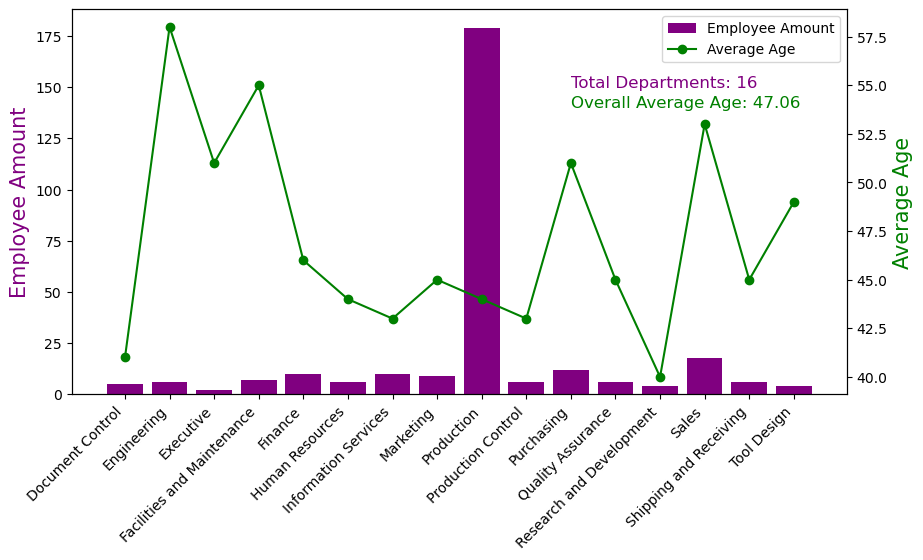

In [93]:
# Graph that shows employee counts and average ages
fig, ax1 = plt.subplots(figsize=(10,5))
# Creating dual graph
ax2 = ax1.twinx() 

bar_plot= ax1.bar(department_data['DepartmentName'], department_data['EmployeeCount'], color='purple')
line_plot= ax2.plot(department_data['DepartmentName'], department_data['AverageAge'], color='green', marker='o')

ax1.set_ylabel('Employee Amount', color='purple', size=15)
ax2.set_ylabel('Average Age', color='green', size=15)

ax1.set_xticks(range(len(department_data['DepartmentName'])))
ax1.set_xticklabels(department_data['DepartmentName'], rotation=45, ha='right')

ax1.legend([bar_plot, line_plot[0]], ['Employee Amount', 'Average Age'], loc='upper right')

# Adding text and information
total_departments = len(department_data)
average_age = department_data['AverageAge'].mean()
ax1.text(10,150, f'Total Departments: {total_departments}', fontsize=12, color='purple')
ax1.text(10,140, f'Overall Average Age: {average_age:.2f}', fontsize=12, color='green')

plt.show()

# Salesperson Schema

## Sales.SalesPerson Table

In [12]:
df16=pd.read_sql('SELECT * FROM Sales.SalesPerson', con=connection)
df16.head(10)

,BusinessEntityID,TerritoryID,SalesQuota,Bonus,CommissionPct,SalesYTD,SalesLastYear,rowguid,ModifiedDate
0,274,NaN,NaN,0.0,0.000,5.596976e+05,0.000000e+00,48754992-9EE0-4C0E-8C94-9451604E3E02,2010-12-28
1,275,2.0,300000.0,4100.0,0.012,3.763178e+06,1.750406e+06,1E0A7274-3064-4F58-88EE-4C6586C87169,2011-05-24
2,276,4.0,250000.0,2000.0,0.015,4.251369e+06,1.439156e+06,4DD9EEE4-8E81-4F8C-AF97-683394C1F7C0,2011-05-24
3,277,3.0,250000.0,2500.0,0.015,3.189418e+06,1.997186e+06,39012928-BFEC-4242-874D-423162C3F567,2011-05-24
4,278,6.0,250000.0,500.0,0.010,1.453719e+06,1.620277e+06,7A0AE1AB-B283-40F9-91D1-167ABF06D720,2011-05-24
5,279,5.0,300000.0,6700.0,0.010,2.315186e+06,1.849641e+06,52A5179D-3239-4157-AE29-17E868296DC0,2011-05-24
6,280,1.0,250000.0,5000.0,0.010,1.352577e+06,1.927059e+06,BE941A4A-FB50-4947-BDA4-BB8972365B08,2011-05-24
7,281,4.0,250000.0,3550.0,0.010,2.458536e+06,2.073506e+06,35326DDB-7278-4FEF-B3BA-EA137B69094E,2011-05-24
8,282,6.0,250000.0,5000.0,0.015,2.604541e+06,2.038235e+06,31FD7FC1-DC84-4F05-B9A0-762519EACACC,2011-05-24
9,283,1.0,250000.0,3500.0,0.012,1.573013e+06,1.371635e+06,6BAC15B2-8FFB-45A9-B6D5-040E16C2073F,2011-05-24


In [60]:
# Sales YTD sorted by Business Entity ID
sales_rep_sales = df16.groupby(by=['BusinessEntityID'])['SalesYTD'].sum()
sales_rep_sales = pd.DataFrame(sales_rep_sales).sort_values(ascending=False, by='SalesYTD')
sales_rep_sales

,SalesYTD
BusinessEntityID,
276,4.251369e+06
289,4.116871e+06
275,3.763178e+06
277,3.189418e+06
290,3.121616e+06
282,2.604541e+06
281,2.458536e+06
279,2.315186e+06
288,1.827067e+06


In [62]:
# Sales Last Year sorted by Business Entity ID
sales_rep_sales = df16.groupby(by=['BusinessEntityID'])['SalesLastYear'].sum()
sales_rep_sales = pd.DataFrame(sales_rep_sales).sort_values(ascending=False, by='SalesLastYear')
sales_rep_sales

,SalesLastYear
BusinessEntityID,
290,2.396540e+06
286,2.278549e+06
281,2.073506e+06
282,2.038235e+06
277,1.997186e+06
280,1.927059e+06
279,1.849641e+06
275,1.750406e+06
289,1.635823e+06


In [13]:
# Total sale YTD
df16['SalesYTD'].sum()

36277591.903400004

In [68]:
# Total sale last year
df16['SalesLastYear'].sum()

23685963.624399997

In [71]:
# Total bonus
df16['Bonus'].sum()

48610.0

# Person Schema

## Person.Person Table

In [2]:
# All employees firstname, Lastname and Employee ID
employee_name_query = """
SELECT Firstname, Lastname, businessentityid as Employee_id  
FROM person.person AS e  
ORDER BY Firstname;"""
employee_data = pd.read_sql(employee_name_query, con=connection)
print(employee_data)

      Firstname    Lastname  Employee_id
0            A.    Leonetti         1305
1            A.      Wright         2321
2      A. Scott      Wright          222
3         Aaron      Wright        17137
4         Aaron        Yang         5522
...         ...         ...          ...
19967       Zoe     Ramirez         8301
19968       Zoe  Richardson         8460
19969       Zoe        Reed         9122
19970       Zoe     Sanders         8042
19971       Zoe     Sanchez         9510

[19972 rows x 3 columns]


## Person.BusinessEntityAddress and Person.Address Tables

In [29]:
# Number of employees for each City
employees_in_city_query = """
SELECT a.City, COUNT(b.AddressID) NoOfEmployees 
FROM Person.BusinessEntityAddress AS b   
    INNER JOIN Person.Address AS a  
        ON b.AddressID = a.AddressID  
GROUP BY a.City  
ORDER BY a.City;"""
employees_in_city_data = pd.read_sql(employees_in_city_query, con=connection)
print(employees_in_city_data)

           City  NoOfEmployees
0      Abingdon              1
1        Albany              4
2    Alexandria              2
3      Alhambra              1
4        Alpine              1
..          ...            ...
570  Woonsocket              1
571    Wrentham              1
572      Yakima             96
573        York            117
574     Zeeland              1

[575 rows x 2 columns]


## Person.CountryRegion Table

In [22]:
# CountryRegion Table
df6=pd.read_sql('SELECT * from Person.CountryRegion', con=connection)

In [79]:
# Total number of countries
df6.count()

CountryRegionCode    238
Name                 238
ModifiedDate         238
dtype: int64

In [80]:
# Name of the countries
df6['Name']

0                   Andorra
1      United Arab Emirates
2               Afghanistan
3       Antigua and Barbuda
4                  Anguilla
               ...         
233                   Yemen
234                 Mayotte
235            South Africa
236                  Zambia
237                Zimbabwe
Name: Name, Length: 238, dtype: object

## Person.StateProvince Table

In [81]:
# StateProvince Table
df7=pd.read_sql('SELECT * from Person.StateProvince', con=connection)

In [84]:
# Name of the states
df7['Name']

0                Alberta
1                 Alaska
2                Alabama
3               Arkansas
4         American Samoa
             ...        
176              Essonne
177       Hauts de Seine
178    Seine Saint Denis
179         Val de Marne
180           Val d'Oise
Name: Name, Length: 181, dtype: object

In [83]:
# Total number of states
df7['Name'].count()

181

## Person.Address, Person.BusinessEntityAddress and Person.Person Tables

In [60]:
# Top 10 cities by customer
top_customer_query = """
SELECT TOP (10) 
    City, 
    COUNT(*) AS 'Number of Customers'
FROM Person.Address 
JOIN Person.BusinessEntityAddress 
    ON Address.AddressID = BusinessEntityAddress.AddressID
JOIN Person.Person 
    ON BusinessEntityAddress.BusinessEntityID = Person.BusinessEntityID
GROUP BY City 
ORDER BY 'Number of Customers' DESC;"""
top_customer_data = pd.read_sql(top_customer_query, con=connection)
print(top_customer_data)

          City  Number of Customers
0       London                  420
1        Paris                  386
2       Burien                  212
3      Concord                  212
4   Bellingham                  210
5    Beaverton                  210
6  Chula Vista                  206
7     Berkeley                  200
8   Burlingame                  198
9   Bellflower                  194


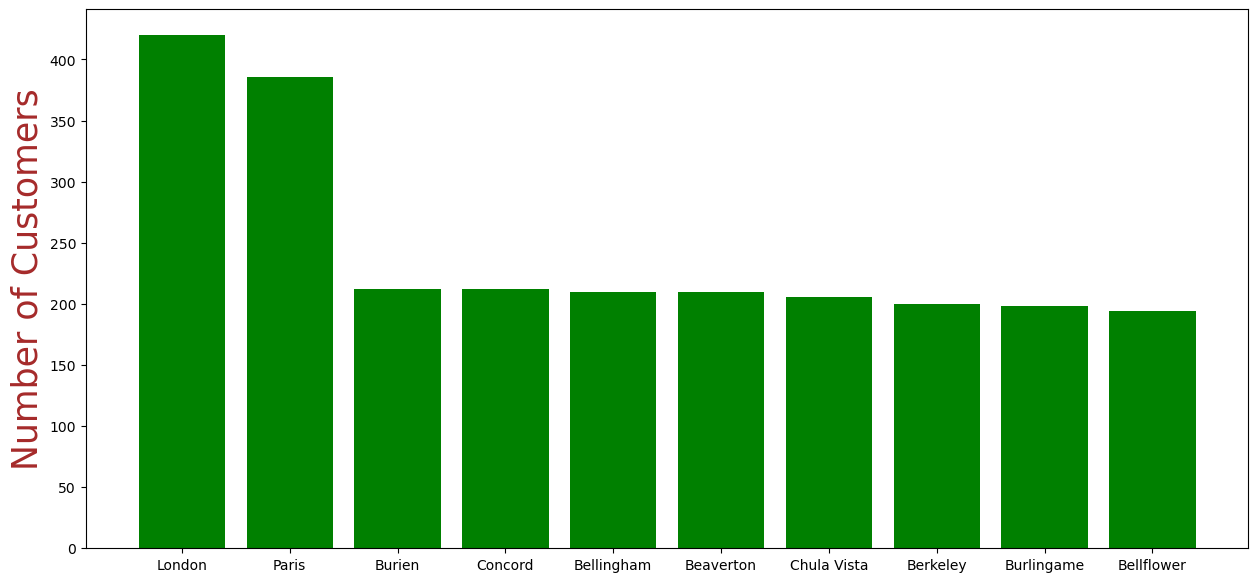

In [61]:
# Graph of top cities by customer
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(top_customer_data['City'], top_customer_data['Number of Customers'], color='green')
ax.set_ylabel('Number of Customers',size=25, color="brown")
plt.show()

# Multiple Mixed Schemas

## Person.Person, HumanResources.Employee and Person.BusinessEntityAddress Tables

In [33]:
# Employee's full name (firstname and lastname) and city
employee_city_query = """
SELECT concat(RTRIM(p.FirstName),' ', LTRIM(p.LastName)) AS Name, d.City  
FROM Person.Person AS p  
INNER JOIN HumanResources.Employee e ON p.BusinessEntityID = e.BusinessEntityID   
INNER JOIN  
   (SELECT bea.BusinessEntityID, a.City   
    FROM Person.Address AS a  
    INNER JOIN Person.BusinessEntityAddress AS bea  
    ON a.AddressID = bea.AddressID) AS d  
ON p.BusinessEntityID = d.BusinessEntityID  
ORDER BY p.LastName, p.FirstName;"""

employee_city_data = pd.read_sql(employee_city_query, con=connection)
print(employee_city_data)

                   Name       City
0            Syed Abbas    Bothell
1       Kim Abercrombie  Carnation
2        Hazem Abolrous    Kenmore
3        Pilar Ackerman    Seattle
4             Jay Adams     Monroe
..                  ...        ...
285             Nuan Yu   Bellevue
286         Gary Yukish    Edmonds
287  Eugene Zabokritski  Sammamish
288  Kimberly Zimmerman    Seattle
289    Michael Zwilling    Edmonds

[290 rows x 2 columns]


## Person.BusinessEntityContact, Person.ContactType and Person.Person Tables

In [34]:
# All Purchasing Manager's BusinessEntityID, FirstName, and LastName
purchasing_manager_query = """
SELECT pp.BusinessEntityID, FirstName, LastName
    FROM Person.BusinessEntityContact AS pb 
        INNER JOIN Person.ContactType AS pc
            ON pc.ContactTypeID = pb.ContactTypeID
        INNER JOIN Person.Person AS pp
            ON pp.BusinessEntityID = pb.PersonID
    WHERE pc.Name = 'Purchasing Manager'
    ORDER BY FirstName, LastName;"""
purchasing_manager_data = pd.read_sql(purchasing_manager_query, con=connection)
print(purchasing_manager_data)

     BusinessEntityID  FirstName     LastName
0                 727      Aaron          Con
1                 413       Adam         Barr
2                1381       Ajay  Manchepalli
3                1803       Alan      Steiner
4                 921     Aldeen    Gallagher
..                ...        ...          ...
240              2034      Wendy      Wheeler
241               731    William       Conner
242              1019    William        Hapke
243               683  Yao-Qiang        Cheng
244              1435     Yvonne        McKay

[245 rows x 3 columns]


In [35]:
# Total number of purchasing manager
purchasing_manager_data['BusinessEntityID'].count()

245

## Person.Person and HumanResources.EmployeePayHistory Tables

In [9]:
# Latest weekly salary with RateChangeDate, FullName (first name, middle name and last name) and weekly salary (40 hours in a week) of employees
employee_query = """
SELECT CAST(hur.RateChangeDate as VARCHAR(10) ) AS FromDate
        , CONCAT(LastName, ', ', FirstName, ' ', MiddleName) AS FullName
        , (40 * hur.Rate) AS SalaryPerWeek
    FROM Person.Person AS pp
        INNER JOIN HumanResources.EmployeePayHistory AS hur
            ON hur.BusinessEntityID = pp.BusinessEntityID
             WHERE hur.RateChangeDate = (SELECT MAX(RateChangeDate)
                                FROM HumanResources.EmployeePayHistory 
                                WHERE BusinessEntityID = hur.BusinessEntityID)
    ORDER BY FullName;"""
employee_data = pd.read_sql(employee_query, con=connection)
print(employee_data)

       FromDate               FullName  SalaryPerWeek
0    Mar 14 201          Abbas, Syed E       1924.040
1    Jan 16 201     Abercrombie, Kim B        498.000
2    Feb 28 200      Abolrous, Hazem E       1153.848
3    Jan  2 200      Ackerman, Pilar G        769.232
4    Mar  5 200           Adams, Jay G        498.000
..          ...                    ...            ...
285  Jan  6 200              Yu, Nuan         440.000
286  Dec 22 200         Yukish, Gary W        600.000
287  Jan 21 200  Zabokritski, Eugene R        380.000
288  Jan 12 201  Zimmerman, Kimberly B        538.000
289  Feb 23 201    Zwilling, Michael J        498.000

[290 rows x 3 columns]


In [10]:
# Calculating total salary per week
employee_data['SalaryPerWeek'].sum()

210983.776

## HumanResources.Employee and Person.Person Tables

In [47]:
# Total number of hours away from work by adding vacation time and sick leave
total_hours_leave_query = """
SELECT p.FirstName, p.LastName, VacationHours, SickLeaveHours,   
    VacationHours + SickLeaveHours AS "TotalHoursAway"  
FROM HumanResources.Employee AS e  
    JOIN Person.Person AS p ON e.BusinessEntityID = p.BusinessEntityID  
ORDER BY "TotalHoursAway" DESC;"""
total_hours_leave_data = pd.read_sql(total_hours_leave_query, con=connection)
print(total_hours_leave_data)

    FirstName     LastName  VacationHours  SickLeaveHours  TotalHoursAway
0        Chad    Niswonger             99              69             168
1       Betsy      Stadick             99              69             168
2         Ken      Sánchez             99              69             168
3         Tom  Vande Velde             98              69             167
4     Michael       Patten             98              69             167
..        ...          ...            ...             ...             ...
285       Min           Su              1              20              21
286     Terri        Duffy              1              20              21
287     Laura       Norman              0              20              20
288   Hung-Fu         Ting              0              20              20
289    Mandar       Samant              0              20              20

[290 rows x 5 columns]


## Sales.SalesPerson, HumanResources.Employee and Person.Person Tables

In [48]:
# Sales targets per month for salesperson
sales_target_query = """
SELECT s.BusinessEntityID AS SalesPersonID, FirstName, LastName, SalesQuota, SalesQuota/12 AS "Sales Target Per Month" 
FROM Sales.SalesPerson AS s   
JOIN HumanResources.Employee AS e   
    ON s.BusinessEntityID = e.BusinessEntityID  
JOIN Person.Person AS p   
    ON e.BusinessEntityID = p.BusinessEntityID;"""
sales_target_data = pd.read_sql(sales_target_query, con=connection)
print(sales_target_data)

    SalesPersonID FirstName           LastName  SalesQuota  \
0             274   Stephen              Jiang         NaN   
1             275   Michael             Blythe    300000.0   
2             276     Linda           Mitchell    250000.0   
3             277   Jillian             Carson    250000.0   
4             278   Garrett             Vargas    250000.0   
5             279      Tsvi             Reiter    300000.0   
6             280    Pamela       Ansman-Wolfe    250000.0   
7             281       Shu                Ito    250000.0   
8             282      José            Saraiva    250000.0   
9             283     David           Campbell    250000.0   
10            284      Tete        Mensa-Annan    300000.0   
11            285      Syed              Abbas         NaN   
12            286      Lynn           Tsoflias    250000.0   
13            287       Amy            Alberts         NaN   
14            288    Rachel             Valdez    250000.0   
15      

## Sales.SalesOrderHeader and Person.Address Tables

In [56]:
# Top 10 cities by revenue
city_revenue_query = """
SELECT TOP (10)
    Address.City,
    COUNT(SalesOrderHeader.SalesOrderID) AS 'TotalOrders',
    SUM(SalesOrderHeader.TotalDue) AS 'TotalRevenue'
FROM Sales.SalesOrderHeader
JOIN Person.Address 
ON Sales.SalesOrderHeader.BillToAddressID = Person.Address.AddressID
GROUP BY Address.City
ORDER BY 'TotalRevenue' DESC;"""
city_revenue_data = pd.read_sql(city_revenue_query, con=connection)
print(city_revenue_data)


       City  TotalOrders  TotalRevenue
0   Toronto          176  5.034270e+06
1    London          756  3.071177e+06
2     Paris          575  2.233808e+06
3   Seattle          134  1.767308e+06
4   Burnaby           98  1.503464e+06
5  Richmond           43  1.419264e+06
6  Montreal           75  1.274667e+06
7   Garland           24  1.267787e+06
8   Memphis           27  1.246122e+06
9    Nashua           16  1.244107e+06


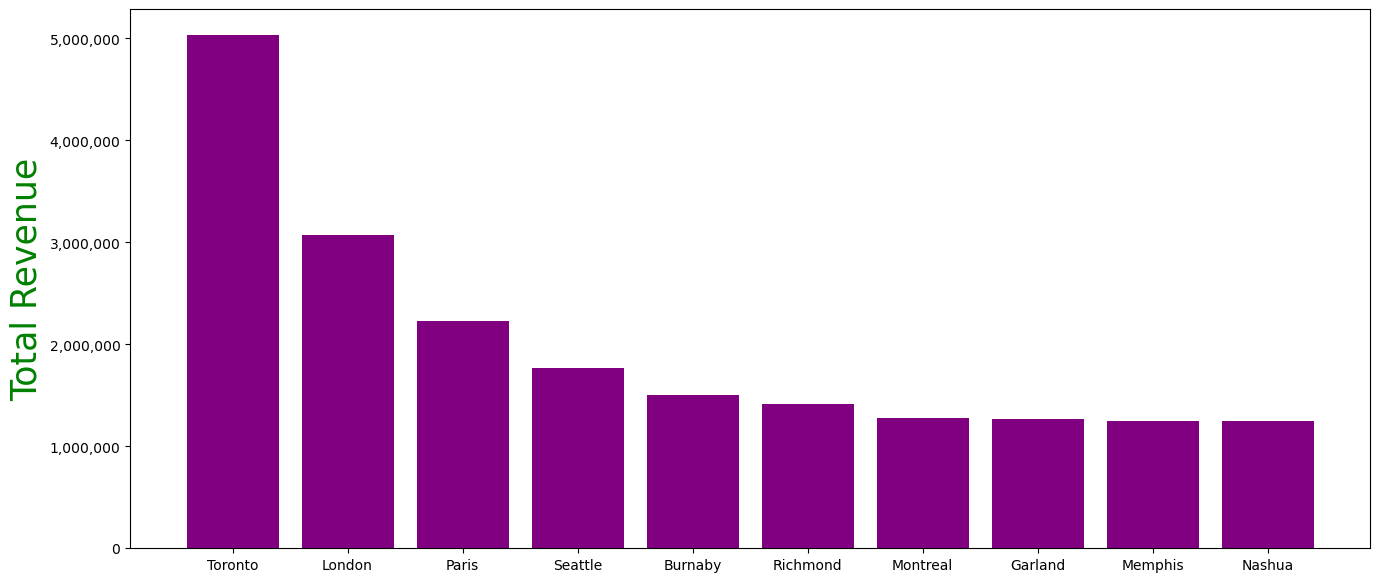

In [57]:
# Graphical reprentation of top cities by revenue
fig, ax = plt.subplots(figsize=(16, 7))
ax.bar(city_revenue_data['City'], city_revenue_data['TotalRevenue'], color='purple')
ax.set_ylabel('Total Revenue', size=25, color='green')

# Customizing revenue figure 
ax.yaxis.set_major_formatter(lambda x, _: '{:,}'.format(int(x)))

plt.show()

## Sales.SalesOrderDetail, Production.Product and Production.ProductCategory Tables

In [58]:
# Top selling products
selling_query = """
SELECT 
       D.Name AS 'Product Category', 
       SUM(ROUND(A.LineTotal,2)) AS 'Total Sales', 
       SUM(A.OrderQty) AS 'Total Quantity Sold'
FROM Sales.SalesOrderDetail AS A
JOIN Production.Product AS B 
    ON A.ProductID = B.ProductID
JOIN Production.ProductSubcategory AS C 
    ON B.ProductSubcategoryID = C.ProductSubcategoryID
JOIN Production.ProductCategory AS D
    ON C.ProductCategoryID = D.ProductCategoryID
WHERE A.UnitPriceDiscount > 0
GROUP BY D.Name;
"""
selling_data = pd.read_sql(selling_query, con=connection)
print(selling_data)


  Product Category  Total Sales  Total Quantity Sold
0         Clothing    479780.78                18627
1            Bikes   4601049.01                 7526
2      Accessories    143811.43                 6586
3       Components    198050.52                 1080


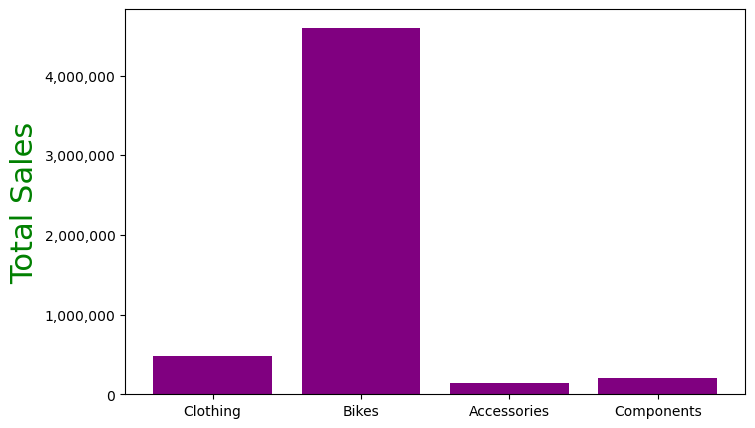

In [59]:
# Graphical reprentation of top selling products
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(selling_data['Product Category'], selling_data['Total Sales'], color='purple')
ax.set_ylabel('Total Sales', size= 22, color='green')

# Customizing sales figure 
ax.yaxis.set_major_formatter(lambda x, _: '{:,}'.format(int(x)))

plt.show()

## Production.Product and Sales.SalesOrderDetail Tables 

In [63]:
# All product name and salesorderid
all_product_query = """
SELECT p.Name, sod.SalesOrderID  
FROM Production.Product AS p  
INNER JOIN Sales.SalesOrderDetail AS sod  
ON p.ProductID = sod.ProductID  
ORDER BY p.Name;"""
all_product_data = pd.read_sql(all_product_query, con=connection)
print(all_product_data)

                          Name  SalesOrderID
0       All-Purpose Bike Stand         51179
1       All-Purpose Bike Stand         51488
2       All-Purpose Bike Stand         51520
3       All-Purpose Bike Stand         51558
4       All-Purpose Bike Stand         51882
...                        ...           ...
121312       Women's Tights, S         50758
121313       Women's Tights, S         51750
121314       Women's Tights, S         53609
121315       Women's Tights, S         57066
121316       Women's Tights, S         71691

[121317 rows x 2 columns]


In [64]:
# Total number of products and product IDs
all_product_data[["Name","SalesOrderID"]].count()

Name            121317
SalesOrderID    121317
dtype: int64

# Statistical analysis by Confidence interval

### The average sales price of bicycles using 95% confidence interval by using the formula is x̄±t*( s/√n) where x̄=Sample mean, t=Desired confidence level and degrees of freedom (n-1), s=Sample standard deviation and n=Sample size

In [66]:
# Finding average sales between 2011-01-01 and 2014-12-31
ci_query = """
SELECT 
    AVG(ListPrice) AS 'Average List Price',
    STDEV(ListPrice) AS 'Standard Deviation',
    COUNT(*) AS 'Sample Size'
FROM Production.Product AS A
JOIN Production.ProductSubcategory AS B
    ON A.ProductSubcategoryID = B.ProductSubcategoryID
JOIN Production.ProductCategory AS C
    ON B.ProductCategoryID = C.ProductCategoryID
WHERE C.Name = 'Bikes'
AND A.SellStartDate BETWEEN '2011-01-01' AND '2014-12-31';"""
ci_data = pd.read_sql(sql=ci_query, con=connection)
print(ci_data)

   Average List Price  Standard Deviation  Sample Size
0            1586.737          996.268721           97


In [75]:
#Calculating confidence interval manually
quantile = t.ppf(1 - (1 - ci_perc) / 2, n-1)

ci_lower = mean - quantile*(std/np.sqrt(n))
ci_upper = mean + quantile*(std/np.sqrt(n))

print('Confidence Interval for Average List Price:', (ci_lower, ci_upper))

Confidence Interval for Average List Price: (1385.944398291827, 1787.5296017081732)


In [72]:
# Calculating confidence interval by using a built in function
mean = ci_data['Average List Price'].iloc[0]
std = ci_data['Standard Deviation'].iloc[0]
n = ci_data['Sample Size'].iloc[0]
ci_perc = 0.95
confidence_interval = t.interval(0.95, n-1, mean, std/np.sqrt(n))
print('Confidence Interval for Average List Price:',confidence_interval)

Confidence Interval for Average List Price: (1385.944398291827, 1787.5296017081732)


In [74]:
# Thank you so much! :)